In [16]:
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

raw_csv_data = pd.read_csv("df/Index2018.csv") 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')



In [11]:
ma = ARMA(df.spx, order=(0,6))
ma_fit = ma.fit()
ma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(0, 6)   Log Likelihood              -32282.114
Method:                       css-mle   S.D. of innovations             41.401
Date:                Sat, 30 May 2020   AIC                          64580.228
Time:                        13:00:32   BIC                          64634.185
Sample:                    01-07-1994   HQIC                         64598.923
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.8319      8.242    156.382      0.000    1272.679    1304.985
ma.L1.spx      2.3215      0.012    190.522      0.000       2.298       2.345
ma.L2.spx      3.4295      0.023    146.658      0.000       3.384       3.475
ma.L3.spx      3.7034      0.028    131.207      0.000       3.648       3.759
ma.L4.spx      3.0035      0.025    119.345      0.000       2.954       3.053
ma.L5.spx      1.7323      0.017    101.238      0.000       1.699       1.766
ma.L6.spx      0.5884      0.008     70.273      0.000       0.572       0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.1185           -1.0388j            1.0455           -0.2319
MA.2            0.1185           +1.0388j            1.0455            0.2319
MA.3           -1.0496           -0.4073j            1.1258           -0.4411
MA.4           -1.0496           +0.4073j            1.1258            0.4411
MA.5           -0.5411           -0.9664j            1.1076           -0.3312
MA.6           -0.5411           +0.9664j            1.1076            0.3312
-----------------------------------------------------------------------------
"""

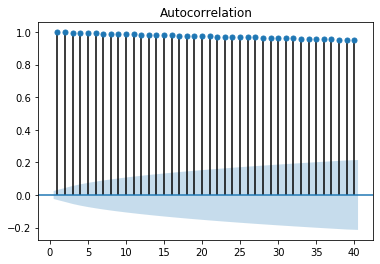

In [17]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df.spx, zero = False, lags=40)
plt.show()

C:\Users\alejandro\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


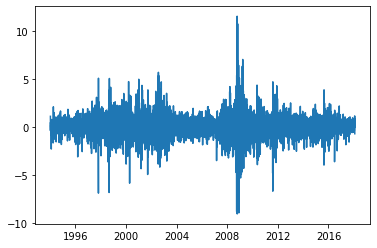

In [23]:
df['returns'] = df.spx.pct_change(1)*100
plt.plot(df.returns[1:])

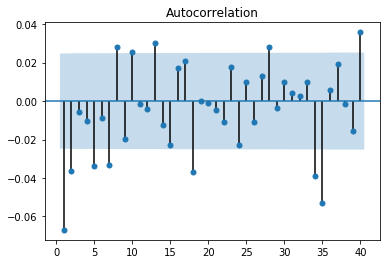

In [26]:

sgt.plot_acf(df.returns[1:], zero = False, lags=40)
plt.show()

In [37]:
import statsmodels.tsa.stattools as sts
adfuller_result = sts.adfuller(df.returns[1:])
print('Es estacionaria: {} con P-value {}'.format(adfuller_result[1] < 0.05, adfuller_result[1]))

Es estacionaria: True con P-value 1.9848251568202323e-26


In [40]:
resid = ma_fit.resid[1:]
adfuller_resid_result = sts.adfuller(resid)
print('Es estacionaria: {} con P-value {}'.format(adfuller_resid_result[1] < 0.05, adfuller_resid_result[1]))

Es estacionaria: False con P-value 0.9947754699211256


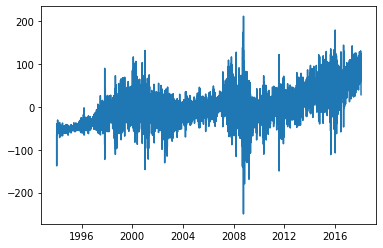

In [43]:
plt.plot(resid)